In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as sts
# import quandl
import os
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sn

import quandl
from config import api_key

## SP500 Data

In [2]:
SP500 = pd.read_csv('SP500.csv')
del SP500['Change']
del SP500['High']
del SP500['Low']
del SP500['Settle']
del SP500['Previous Day Open Interest']
SP500.rename(columns={'Last':'Close'}, inplace=True)
SP500['Date']= pd.to_datetime(SP500['Date'])


# Calculate 10day MA on Price and Volume
SP500['10day_MA'] = SP500['Close'].rolling(window=10).mean()
SP500['10day_MA_Volume'] = SP500['Volume'].rolling(window=10).mean()


SP500.dropna()

,Date,Open,Close,Volume,10day_MA,10day_MA_Volume
9,1997-09-22,974.50,976.75,5.0,947.000,9735.7
10,1997-09-23,975.00,972.25,11.0,949.825,9647.2
11,1997-09-24,979.25,964.75,13.0,953.800,8422.4
12,1997-09-25,965.00,956.75,16.0,957.650,7448.1
13,1997-09-26,962.75,963.50,24.0,960.625,5600.9
...,...,...,...,...,...,...
5810,2020-07-09,3158.50,3131.75,988.0,3094.175,1914.0
5811,2020-07-10,3138.00,3168.25,1527.0,3104.675,1782.8
5812,2020-07-13,3171.75,3137.75,1450.0,3119.200,1645.2
5813,2020-07-14,3144.00,3173.00,2675.0,3132.900,1652.9


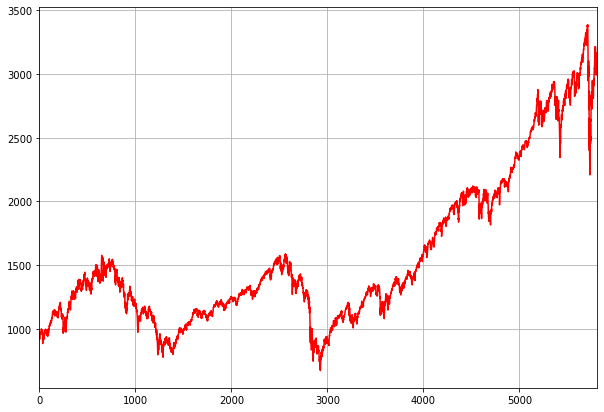

In [3]:
SP500.Close.plot(figsize=(10,7), color='r')
plt.grid(True)
plt.show()

In [4]:
USD_Libor = pd.read_csv('USD_LIBOR.csv')
JPY_Libor = pd.read_csv('JPY_LIBOR.csv')

In [5]:
JPY_Libor.shape

(8726, 2)

In [6]:
USD_Libor['Date']= pd.to_datetime(USD_Libor['Date'])

In [7]:
JPY_Libor['Date']= pd.to_datetime(JPY_Libor['Date'])

In [8]:
USD_JPY_Rates_df = pd.merge(USD_Libor,JPY_Libor,on=['Date'])

In [9]:
USD_JPY_Rates_df['USD/JPY_Spread'] = USD_JPY_Rates_df['USD_3M_LIBOR'] - USD_JPY_Rates_df['JPY_3M_Libor']

In [10]:
USD_JPY_Rates_df = USD_JPY_Rates_df.loc[USD_JPY_Rates_df['Date']>='1997-10-03']

In [11]:
del USD_JPY_Rates_df['USD_3M_LIBOR']
del USD_JPY_Rates_df['JPY_3M_Libor']

In [12]:
USD_JPY_Rates_df

,Date,USD/JPY_Spread
2967,1997-10-03,5.21875
2968,1997-10-06,5.18750
2969,1997-10-07,5.18750
2970,1997-10-08,5.18750
2971,1997-10-09,5.21875
...,...,...
8718,2020-07-09,0.31525
8719,2020-07-10,0.31713
8720,2020-07-13,0.32250
8721,2020-07-14,0.31738


In [13]:
linear_reg_master_df = pd.merge(SP500,USD_JPY_Rates_df,on=['Date'])

In [14]:
linear_reg_master_df

,Date,Open,Close,Volume,10day_MA,10day_MA_Volume,USD/JPY_Spread
0,1997-10-03,996.00,986.00,6.0,971.000,12.7,5.21875
1,1997-10-06,989.25,989.00,21.0,972.225,14.3,5.18750
2,1997-10-07,993.50,1000.00,1.0,975.000,13.3,5.18750
3,1997-10-08,990.00,992.75,6.0,977.800,12.6,5.18750
4,1997-10-09,989.00,988.50,3.0,980.975,11.3,5.21875
...,...,...,...,...,...,...,...
5675,2020-07-09,3158.50,3131.75,988.0,3094.175,1914.0,0.31525
5676,2020-07-10,3138.00,3168.25,1527.0,3104.675,1782.8,0.31713
5677,2020-07-13,3171.75,3137.75,1450.0,3119.200,1645.2,0.32250
5678,2020-07-14,3144.00,3173.00,2675.0,3132.900,1652.9,0.31738


## 10 Year US Treasury Yield

In [15]:
UST_Curve = pd.read_csv('UST_Curve.csv')
Ten_Year = pd.DataFrame({'Date':UST_Curve['Date'],
                        'Ten_Year': UST_Curve['10 YR']
                        })
Ten_Year = Ten_Year.loc[Ten_Year['Date']>='1997-10-03']
Ten_Year['Date'] = pd.to_datetime(Ten_Year['Date'])
Ten_Year.dropna()
Ten_Year = Ten_Year.set_index('Date')

In [16]:
Ten_Year

,Ten_Year
Date,
1997-10-03,6.01
1997-10-06,5.96
1997-10-07,5.94
1997-10-08,6.08
1997-10-09,6.09
...,...
2020-07-08,0.67
2020-07-09,0.62
2020-07-10,0.65


In [17]:
linear_reg_master_df = pd.merge(linear_reg_master_df,Ten_Year,on=['Date'])

## VIX

In [18]:
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX.loc[VIX['Date']>='1997-10-03']
VIX.dropna()

,Date,VIX
1961,1997-10-03,21.54
1962,1997-10-06,21.61
1963,1997-10-07,20.29
1964,1997-10-08,20.77
1965,1997-10-09,22.31
...,...,...
7686,2020-07-06,27.94
7687,2020-07-07,29.43
7688,2020-07-08,28.08
7689,2020-07-09,29.26


In [19]:
linear_reg_master_df = pd.merge(linear_reg_master_df,VIX,on=['Date'])

## USD/JPY Data

In [20]:
USDJPY = pd.read_csv('USDJPY.csv')
USDJPY.rename(columns={'DATE':'Date'}, inplace=True)
USDJPY.rename(columns={'DEXJPUS':'USDJPY'}, inplace=True)
USDJPY['Date'] = pd.to_datetime(USDJPY['Date'])
USDJPY = USDJPY.loc[USDJPY['Date']>='1997-10-03']
USDJPY.dropna()

,Date,USDJPY
6703,1997-10-03,121.93
6704,1997-10-06,121.93
6705,1997-10-07,122.01
6706,1997-10-08,121.09
6707,1997-10-09,121.18
...,...,...
12414,2020-07-06,107.50
12415,2020-07-07,107.53
12416,2020-07-08,107.39
12417,2020-07-09,107.27


In [21]:
linear_reg_master_df = pd.merge(linear_reg_master_df,USDJPY,on=['Date'])

## Nikkei Data

In [22]:
Nikkei = pd.read_csv('Nikkei.csv')
Nikkei['Date'] = pd.to_datetime(Nikkei['Date'])
Nikkei.rename(columns={'Value':'Nikkei'}, inplace=True)
Nikkei = Nikkei.loc[Nikkei['Date']>='1997-10-03']
Nikkei.dropna()

,Date,Nikkei
12108,1997-10-03,17647.45
12109,1997-10-06,17824.78
12110,1997-10-07,17511.19
12111,1997-10-08,17619.18
12112,1997-10-09,17376.92
...,...,...
17685,2020-07-06,22714.44
17686,2020-07-07,22614.69
17687,2020-07-08,22438.65
17688,2020-07-09,22529.29


In [23]:
linear_reg_master_df = pd.merge(linear_reg_master_df,Nikkei,on=['Date'])

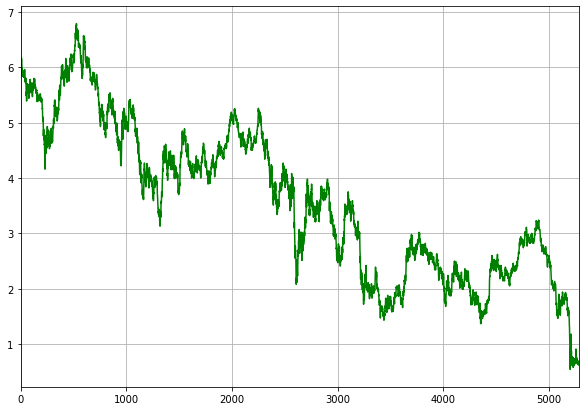

In [24]:
linear_reg_master_df.Ten_Year.plot(figsize=(10,7), color='g')
# linear_reg_master_df.Close.plot(figsize=(10,7), color='g')
plt.grid(True)
plt.show()

In [25]:
linear_reg_master_df['Nikkei_next_day'] = linear_reg_master_df['Nikkei'].shift(-1)
linear_reg_master_df = linear_reg_master_df.dropna()
linear_reg_master_df

,Date,Open,Close,Volume,10day_MA,10day_MA_Volume,USD/JPY_Spread,Ten_Year,VIX,USDJPY,Nikkei,Nikkei_next_day
0,1997-10-03,996.00,986.00,6.0,971.000,12.7,5.21875,6.01,21.54,121.93,17647.45,17824.78
1,1997-10-06,989.25,989.00,21.0,972.225,14.3,5.18750,5.96,21.61,121.93,17824.78,17511.19
2,1997-10-07,993.50,1000.00,1.0,975.000,13.3,5.18750,5.94,20.29,122.01,17511.19,17619.18
3,1997-10-08,990.00,992.75,6.0,977.800,12.6,5.18750,6.08,20.77,121.09,17619.18,17376.92
4,1997-10-09,989.00,988.50,3.0,980.975,11.3,5.21875,6.09,22.31,121.18,17376.92,17306.39
...,...,...,...,...,...,...,...,...,...,...,...,...
5277,2020-07-02,3092.25,3115.25,2031.0,3067.325,192980.1,0.35075,0.68,27.68,107.55,22145.96,22714.44
5278,2020-07-06,3115.25,3158.75,841.0,3077.425,2525.0,0.32367,0.69,27.94,107.50,22714.44,22614.69
5279,2020-07-07,3158.25,3125.00,1087.0,3079.825,2319.3,0.31571,0.65,29.43,107.53,22614.69,22438.65
5280,2020-07-08,3124.75,3154.50,887.0,3085.000,2191.3,0.32205,0.67,28.08,107.39,22438.65,22529.29


In [26]:
linear_reg_master_df.corr()

,Open,Close,Volume,10day_MA,10day_MA_Volume,USD/JPY_Spread,Ten_Year,VIX,USDJPY,Nikkei,Nikkei_next_day
Open,1.000000,0.999499,0.054648,0.999012,0.077981,-0.140661,-0.564637,-0.363762,0.054405,0.837912,0.837816
Close,0.999499,1.000000,0.054800,0.998714,0.077964,-0.140998,-0.564739,-0.367567,0.054403,0.837727,0.838262
Volume,0.054648,0.054800,1.000000,0.058495,0.521061,-0.128688,-0.146670,0.049377,-0.119385,-0.013176,-0.012531
10day_MA,0.999012,0.998714,0.058495,1.000000,0.080072,-0.139856,-0.564461,-0.352650,0.055217,0.836961,0.836881
10day_MA_Volume,0.077981,0.077964,0.521061,0.080072,1.000000,-0.170195,-0.201725,0.046666,-0.158231,-0.007885,-0.006712
USD/JPY_Spread,-0.140661,-0.140998,-0.128688,-0.139856,-0.170195,1.000000,0.796449,0.040384,0.530571,0.305330,0.304209
Ten_Year,-0.564637,-0.564739,-0.146670,-0.564461,-0.201725,0.796449,1.000000,0.112772,0.472317,-0.116972,-0.117997
VIX,-0.363762,-0.367567,0.049377,-0.352650,0.046666,0.040384,0.112772,1.000000,-0.056948,-0.363384,-0.367452
USDJPY,0.054405,0.054403,-0.119385,0.055217,-0.158231,0.530571,0.472317,-0.056948,1.000000,0.405102,0.404625
Nikkei,0.837912,0.837727,-0.013176,0.836961,-0.007885,0.305330,-0.116972,-0.363384,0.405102,1.000000,0.998751


## Linear Regression Model 

In [27]:
X = linear_reg_master_df[['USD/JPY_Spread','Close','USDJPY','10day_MA_Volume','VIX']]

In [28]:
y = linear_reg_master_df[['Nikkei_next_day']]

# Splitting Training/Testing Data 

In [29]:
split = int(0.8*len(linear_reg_master_df))

In [30]:
# Training Data Set
X_train = X[:split]
y_train = y[:split]

# Testing data set
X_test = X[split:]
y_test = y[split:]


## Fitting the Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [34]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")

Training Score: 0.8651969994764959


In [33]:
# X_train

,USD/JPY_Spread,Close,USDJPY,10day_MA_Volume,VIX
0,5.21875,986.00,121.93,12.7,21.54
1,5.18750,989.00,121.93,14.3,21.61
2,5.18750,1000.00,122.01,13.3,20.29
3,5.18750,992.75,121.09,12.6,20.77
4,5.21875,988.50,121.18,11.3,22.31
...,...,...,...,...,...
4220,0.35743,2076.25,123.52,11939.2,15.91
4221,0.37343,2046.75,123.06,16953.6,18.11
4222,0.38129,2081.50,123.10,21232.0,14.81
4223,0.40057,2073.75,123.31,27185.0,15.84


In [34]:
# X_test

,USD/JPY_Spread,Close,USDJPY,10day_MA_Volume,VIX
4225,0.41271,2037.00,121.86,79444.2,19.61
4226,0.42414,2042.75,121.44,157411.5,19.34
4227,0.43557,1998.75,120.94,391149.9,24.39
4228,0.44275,2011.50,120.57,654394.4,22.73
4229,0.44646,2037.50,121.66,867078.7,20.95
...,...,...,...,...,...
5277,0.35075,3115.25,107.55,192980.1,27.68
5278,0.32367,3158.75,107.50,2525.0,27.94
5279,0.31571,3125.00,107.53,2319.3,29.43
5280,0.32205,3154.50,107.39,2191.3,28.08


## Nikkei Price Prediction

In [37]:
predicted_price = model.predict(X_train)
mse = mean_squared_error(y_train, predicted_price)
r2 = r2_score(y_train, predicted_price)

In [39]:
model.score(X_test,y_test)


-0.8201178507645677

In [ ]:
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])

# predicted_price.plot(figsize=(10, 7))

# y_test.plot()
# plt.legend(['model_price', 'actual_price'])
# plt.ylabel("Nikkei Index Price")
# plt.show()

In [36]:
predicted_price

array([[18239.66274938],
       [18281.93223163],
       [17970.22146854],
       ...,
       [26319.63965948],
       [26548.34035575],
       [26359.57780835]])

In [37]:
y_test

,Nikkei_next_day
4225,19046.55
4226,19230.48
4227,18883.42
4228,18565.90
4229,19049.91
...,...
5277,22714.44
5278,22614.69
5279,22438.65
5280,22529.29


In [ ]:
# from sklearn.linear_model import LinearRegression

# # pandas and numpy are used for data manipulation
# import pandas as pd
# import numpy as np

# # matplotlib and seaborn are used for plotting graphs
# import matplotlib.pyplot as plt

In [ ]:
# Df = pd.read_csv('SP500.csv')

In [ ]:
# Df = Df[['Last']]

In [ ]:
# Df.dropna()

In [ ]:
# Df.Last.plot(figsize=(10, 7),color='r')
# plt.ylabel("SP500 Price")
# plt.title("SP500 Price")
# plt.show()

In [ ]:
# Df['S_3'] = Df['Last'].rolling(window=3).mean()
# Df['S_9'] = Df['Last'].rolling(window=9).mean()
# Df['next_day_price'] = Df['Last'].shift(-1)

# Df = Df.dropna()
# # X = Df[['S_3', 'S_9']]

# # Define dependent variable
# y = Df['next_day_price']

In [ ]:
# Df

In [ ]:
# t = .8
# t = int(t*len(Df))

# # Train dataset
# X_train = X[:t]
# y_train = y[:t]

# # Test dataset
# X_test = X[t:]
# y_test = y[t:]

In [ ]:
# linear = LinearRegression().fit(X_train, y_train)
# print("Linear Regression model")
# print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
# + %.2f * 9 Days Moving Average (x2) \
# + %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

In [ ]:
# predicted_price = linear.predict(X_test)
# predicted_price = pd.DataFrame(
#     predicted_price, index=y_test.index, columns=['price'])
# predicted_price.plot(figsize=(10, 7))
# y_test.plot()
# plt.legend(['predicted_price', 'actual_price'])
# plt.ylabel("Gold ETF Price")
# plt.show()

In [ ]:
# r2_score = linear.score(X[t:], y[t:])*100
# float("{0:.2f}".format(r2_score))

In [ ]:
# gold = pd.DataFrame()

# gold['price'] = Df[t:]['Last']
# gold['predicted_price_next_day'] = predicted_price
# gold['actual_price_next_day'] = y_test
# gold['gold_returns'] = gold['price'].pct_change().shift(-1)

# gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

# gold['strategy_returns'] = gold.signal * gold['gold_returns']
# ((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
# plt.ylabel('Cumulative Returns')
# plt.show()